In [2]:
import pandas as pd
df = pd.read_csv('./data/scores.csv')
df.head(3)

,name,kor,eng,math
0,Aiden,100.0,90.0,95.0
1,Charles,90.0,80.0,75.0
2,Danial,95.0,100.0,100.0


### 시리즈 형태로 하나의 열 데이터 추출하기
``` df['컬럼명'] ```


혹은 
``` df.컬럼명 ```

- 아래의 방식은 컬럼명에 공백이나 특수문자가 들어가는 경우 사용할 수 없음 

- 컬럼명은 1개만 지정할 수 있으며 대괄호 하나를 사용한다.


In [5]:
# 'name' 컬럼 추출하기
s_name = df['name']
s_name.head(3) # 왼쪽의 0, 1, 2는 인덱스이다.

0      Aiden
1    Charles
2     Danial
Name: name, dtype: object

In [6]:
# type
type(s_name)
# pandas.core.series.Series : Series 형태로 추출되는 것이 해당된다.

pandas.core.series.Series

In [7]:
# index
s_name.index

RangeIndex(start=0, stop=30, step=1)

In [8]:
# value
s_name.values

array(['Aiden', 'Charles', 'Danial', 'Evan', 'Henry', 'Ian', 'James',
       'Julian', 'Justin', 'Kevin', 'Leo', 'Oliver', 'Peter', 'Amy',
       'Chloe', 'Danna', 'Ellen', 'Emma', 'Jennifer', 'Kate', 'Linda',
       'Olivia', 'Rose', 'Sofia', 'Tiffany', 'Vanessa', 'Viviana',
       'Vikkie', 'Winnie', 'Zuly'], dtype=object)

In [9]:
# shape
s_name.shape # 1차원이기 때문에, 뒤의 열은 출력되지 않는다. 

(30,)

In [10]:
# eng 컬럼 추출하기
df.eng.head()

0     90.0
1     80.0
2    100.0
3    100.0
4     35.0
Name: eng, dtype: float64

In [11]:
# math 컬럼 추출하기
df['math'].head()

0     95.0
1     75.0
2    100.0
3    100.0
4     60.0
Name: math, dtype: float64

### 데이터프레임 형태로 여러 열 단위 데이터 추출하기
``` df[['column1', 'column2', ,,,]] ```
- 대괄호 안에 리스트가 들어간다. 
- 하나의 컬럼을 Series 형태로 추출하지 않고, dataframe 형태로 추출할 때 사용하기도 한다.

In [12]:
# 'name', 'kor' 칼럼 추출하기
df[['name', 'kor']].head()

,name,kor
0,Aiden,100.0
1,Charles,90.0
2,Danial,95.0
3,Evan,100.0
4,Henry,NaN


In [18]:
# 'math' 칼럼을 데이터프레임 형태로 추출하기
df_math = df[['math']]
df_math.head()

,math
0,95.0
1,75.0
2,100.0
3,100.0
4,60.0


In [19]:
# type
type(df_math) # pandas.core.frame.DataFrame : Series 형태가 아니다.

pandas.core.frame.DataFrame

### 조건에 따라 데이터 추출하기

- 조건에 따른 각 데이터의 결과를 True / False로 표현하는 boolean 인덱스 형태로 추출된다.
- Boolean 인덱스를 데이터 프레임명[]으로 감싸면 True인 데이터만 추출된다. 

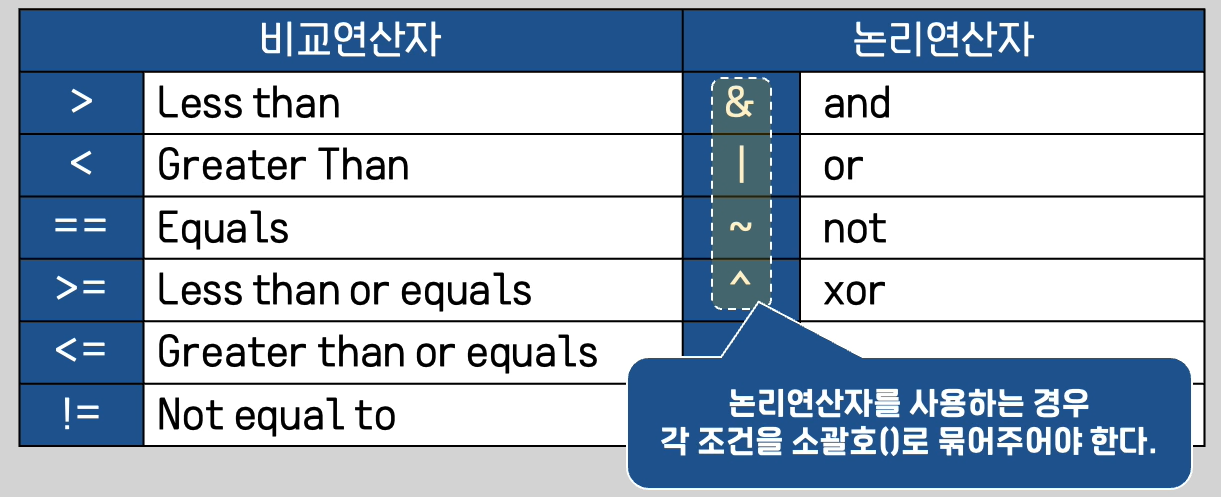

In [22]:
# kor 점수가 100점인 데이터 boolean 인덱스
df['kor'] == 100

0      True
1     False
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9      True
10    False
11    False
12     True
13    False
14    False
15     True
16    False
17    False
18    False
19    False
20     True
21    False
22    False
23     True
24    False
25    False
26     True
27    False
28    False
29    False
Name: kor, dtype: bool

In [23]:
# kor 점수가 100점인 데이터 추출
df[df['kor'] == 100]

,name,kor,eng,math
0,Aiden,100.0,90.0,95.0
3,Evan,100.0,100.0,100.0
9,Kevin,100.0,100.0,90.0
12,Peter,100.0,95.0,100.0
15,Danna,100.0,100.0,100.0
20,Linda,100.0,90.0,100.0
23,Sofia,100.0,100.0,100.0
26,Viviana,100.0,80.0,100.0


### 여러 조건
- 논리 연산자는 **'&', '|', '~', '^'** 기호를 사용한다.
- 논리 연산자를 사용할 때는 각 조건을 **()** 로 감싼다.

In [25]:
# 한 과목이라도 100을 받은 학생 추출
df[(df['kor'] == 100) | (df['eng'] == 100) | (df['math'] == 100)]

,name,kor,eng,math
0,Aiden,100.0,90.0,95.0
2,Danial,95.0,100.0,100.0
3,Evan,100.0,100.0,100.0
5,Ian,90.0,100.0,90.0
8,Justin,50.0,60.0,100.0
9,Kevin,100.0,100.0,90.0
12,Peter,100.0,95.0,100.0
14,Chloe,95.0,100.0,95.0
15,Danna,100.0,100.0,100.0
20,Linda,100.0,90.0,100.0


In [28]:
# kor의 값이 60~90인 학생의 name, kor 추출
df[(df['kor'] >= 60) & (df['kor'] <= 90)][['name', 'kor']]

,name,kor
1,Charles,90.0
5,Ian,90.0
6,James,70.0
7,Julian,80.0
10,Leo,90.0
11,Oliver,70.0
13,Amy,90.0
17,Emma,70.0
18,Jennifer,80.0
21,Olivia,90.0


## 특정 값만 가진 데이터만 추출
``` 컬럼.isin(값리스트) ```


- 결과는 True/False만으로 이루어진 불린 인덱싱 형태로 추출된다.
- 데이터프레임[]으로 감싸면 True인 데이터만 추출된다. 

In [29]:
# 이름이 Amy인 데이터 추출
df['name'].isin(['Amy'])

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13     True
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
Name: name, dtype: bool

In [30]:
df[df['name'].isin(['Amy'])]

,name,kor,eng,math
13,Amy,90.0,75.0,90.0


In [31]:
# 이름이 Amy, Rose인 데이터 추출
df[df['name'].isin(['Amy', 'Rose'])]

,name,kor,eng,math
13,Amy,90.0,75.0,90.0
22,Rose,70.0,65.0,70.0


In [32]:
# kor이 50, 100인 데이터 추출
df[df['kor'].isin([50, 100])]

,name,kor,eng,math
0,Aiden,100.0,90.0,95.0
3,Evan,100.0,100.0,100.0
8,Justin,50.0,60.0,100.0
9,Kevin,100.0,100.0,90.0
12,Peter,100.0,95.0,100.0
15,Danna,100.0,100.0,100.0
19,Kate,50.0,NaN,50.0
20,Linda,100.0,90.0,100.0
23,Sofia,100.0,100.0,100.0
26,Viviana,100.0,80.0,100.0


## null 여부에 따른 데이터 추출

``` 
컬럼.isnull() 
컬럼.notnull() 
```

- 결과는 True/False만으로 이루어진 Boolean 인덱싱 형태로 추출된다.
- 데이터프레임[]으로 감싸면 True인 데이터만 추출된다.

In [33]:
# kor이 null인 데이터 추출
df[df['kor'].isnull()]

,name,kor,eng,math
4,Henry,NaN,35.0,60.0
16,Ellen,NaN,60.0,NaN
27,Vikkie,NaN,50.0,100.0


In [34]:
# kor이 null이 아닌 데이터 추출
df[df['kor'].notnull()]

,name,kor,eng,math
0,Aiden,100.0,90.0,95.0
1,Charles,90.0,80.0,75.0
2,Danial,95.0,100.0,100.0
3,Evan,100.0,100.0,100.0
5,Ian,90.0,100.0,90.0
6,James,70.0,75.0,65.0
7,Julian,80.0,90.0,55.0
8,Justin,50.0,60.0,100.0
9,Kevin,100.0,100.0,90.0
10,Leo,90.0,95.0,70.0
